# Day 08. Exercise 04
# Regression

## 0. Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [84]:
df = pd.read_csv('../data/checker_regression.csv')
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN


In [85]:
df = df.groupby('uid').mean()
df

,num_commits,pageviews,AVG(diff)
uid,,,
user_1,62.0,28.0,NaN
user_10,20.0,89.0,NaN
user_11,7.0,NaN,-2.000000
user_12,86.0,NaN,-89.000000
user_13,52.0,NaN,-48.500000
user_14,61.0,143.0,NaN
user_15,23.0,NaN,-17.500000
user_16,41.0,NaN,-39.333333
user_17,51.0,47.0,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     float64
 1   pageviews    11 non-null     float64
 2   AVG(diff)    18 non-null     float64
dtypes: float64(3)
memory usage: 928.0+ bytes


In [87]:
df.fillna(0, inplace=True)
df

,num_commits,pageviews,AVG(diff)
uid,,,
user_1,62.0,28.0,0.000000
user_10,20.0,89.0,0.000000
user_11,7.0,0.0,-2.000000
user_12,86.0,0.0,-89.000000
user_13,52.0,0.0,-48.500000
user_14,61.0,143.0,0.000000
user_15,23.0,0.0,-17.500000
user_16,41.0,0.0,-39.333333
user_17,51.0,47.0,0.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     float64
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(3)
memory usage: 928.0+ bytes


In [89]:
X = df.drop(columns='AVG(diff)')
y = df['AVG(diff)']

In [90]:
y

uid
user_1       0.000000
user_10      0.000000
user_11     -2.000000
user_12    -89.000000
user_13    -48.500000
user_14      0.000000
user_15    -17.500000
user_16    -39.333333
user_17      0.000000
user_18      0.000000
user_19      0.000000
user_2    -137.200000
user_20    -27.000000
user_21      0.000000
user_22   -141.400000
user_23    -84.000000
user_24   -223.600000
user_25      0.000000
user_26    -52.333333
user_27     -5.333333
user_28      0.000000
user_29   -157.400000
user_3       0.000000
user_30      0.000000
user_31   -104.750000
user_4    -175.600000
user_6     -62.600000
user_7    -115.500000
user_8    -160.400000
Name: AVG(diff), dtype: float64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [100]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits)
    test_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        model.score(X_test, y_test)

        y_train_pred = model.predict(X_train)
        train_rmse = mean_squared_error(y_train, y_train_pred)
        print(train_rmse)
        
        y_test_pred = model.predict(X_test)
        test_rmse = mean_squared_error(y_test, y_test_pred)
        
        test_scores.append(test_rmse)
        
        print(f'train - {train_rmse} | test - {test_rmse}')
        mean_test = np.mean(test_scores)
        
    print(f'Average RMSE on crossval is {mean_test}')

In [101]:
lr = LinearRegression()
crossval(10, X, y, lr)

3728.433675660352
train - 3728.433675660352 | test - 4074.249514730689
4094.4844590293555
train - 4094.4844590293555 | test - 401.4168941637383
3869.2730456618733
train - 3869.2730456618733 | test - 2625.500627036306
3618.317830318466
train - 3618.317830318466 | test - 4649.910514825192
3674.702324420941
train - 3674.702324420941 | test - 4345.8378535922
3154.433245856889
train - 3154.433245856889 | test - 9109.007788589304
3947.517386461991
train - 3947.517386461991 | test - 1809.2505671515285
3476.751279130575
train - 3476.751279130575 | test - 7864.955583257836
3597.0964665933443
train - 3597.0964665933443 | test - 5292.281720079057
3563.219380114993
train - 3563.219380114993 | test - 6185.679872613885
Average RMSE on crossval is 4635.809093603974


In [94]:
tree = DecisionTreeRegressor(max_depth=4, random_state=21)
crossval(10, X, y, tree)

train - 694.377623117623 | test - 3185.0208333333335
train - 778.659504985755 | test - 1848.0149999999996
train - 452.68054487179484 | test - 4637.068148148149
train - 836.9856267806267 | test - 1593.5233564814807
train - 553.1358066239317 | test - 5880.228912037037
train - 918.1248040293041 | test - 11068.436503703704
train - 894.2065796703296 | test - 9826.766296296295
train - 709.9328062678062 | test - 2969.9289120370377
train - 911.1889529914529 | test - 6264.619629629628
train - 521.2393046982168 | test - 10773.766328125
Average RMSE on crossval is 5804.737391979166


In [95]:
forest = RandomForestRegressor(random_state=21)
crossval(10, X, y, forest)

train - 546.4649004230768 | test - 2936.413324666666
train - 614.3621467692303 | test - 2645.6825808981366
train - 555.6632823258558 | test - 6119.7171072592755
train - 692.9041277307697 | test - 2170.034740333336
train - 568.798795458333 | test - 2908.8027763333316
train - 512.6436867617522 | test - 6640.077136074079
train - 521.184086244658 | test - 7285.642476481487
train - 622.3306848087591 | test - 3076.3673084814836
train - 557.7047297350421 | test - 3387.4593523333356
train - 536.9431797674882 | test - 8975.07022188889
Average RMSE on crossval is 4614.526702475003


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [96]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([-63.03752445, -62.507209  , -34.17696015, -62.68398082,
       -14.87331169, -62.86075263])

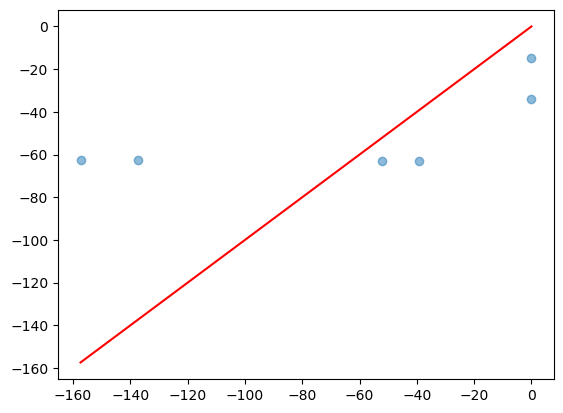

In [97]:
y_pred_lr = lr.predict(X_test)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

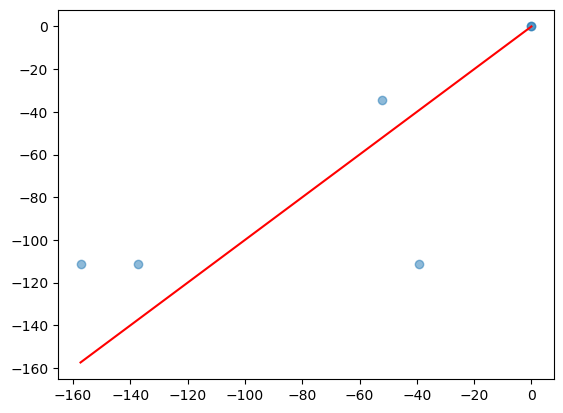

In [98]:
y_pred_tree = tree.predict(X_test)
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

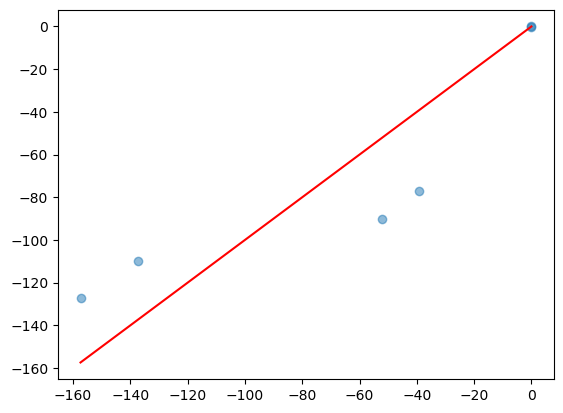

In [99]:
y_pred_forest = forest.predict(X_test)
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

How would plot look like in the ideal case? 

**Answer:** Ideally, the points on the graph lie diagonally on the red